# Determine Whether an MD Trajectory Has Reached Equilibrium
The starting structure for our molecules are very far from equilibrium. 
This notebook checks whether the volume and energy of the structure have equilibrated by reading the output

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from ase.io import read
from ase import units

Configuration

In [2]:
traj_path = Path('md/packmol-CH4-in-H2O=32-seed=0-blyp-npt=298/md.traj')

## Read the Trajoectory
Load in the data

In [3]:
traj = read(str(traj_path), slice(None))
print(f'Loaded {len(traj)} structures')

Loaded 512 structures


## Plot the Volume and Energy
See if they are anywhere close to equilibrating

Compute the density

In [4]:
density = [a.get_masses().sum() / a.get_volume() * units.m ** 3 / units.kg / 1000 for a in traj]

Plot the changes

Text(0.5, 0, 'Timestep')

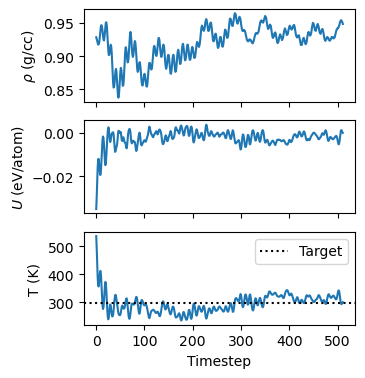

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(3.5, 4.1), sharex=True)

axs[0].plot(density)
axs[0].set_ylabel('$\\rho$ (g/cc)')

axs[1].plot([(a.get_potential_energy() - traj[-1].get_potential_energy()) / len(a) for a in traj])
axs[1].set_ylabel('$U$ (eV/atom)')

axs[2].plot([a.get_temperature() for a in traj])
axs[2].set_ylabel('T (K)')
axs[2].axhline(298, color='k', linestyle='dotted', label='Target')
axs[2].legend()

axs[-1].set_xlabel('Timestep')